# Exercise 2: Image denoising

**Degree** Master Inter-Universitario de Data Science 

**Course** Machine Learning I

**Lecturer** Ignacio Heredia

---

**Objective**

Use the previous deep autoencoder to create an image denoising application.

**Duration**

30 min


**Load dataset**

In [1]:
from keras.datasets import mnist
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Create noisy version of the data

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


**Create the model**

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

**Train the model**

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2844 - val_loss: 0.2221
Epoch 2/50
60000/60000 [==============================] - 4s 58us/step - loss: 0.1996 - val_loss: 0.1822
Epoch 3/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1722 - val_loss: 0.1608
Epoch 4/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1556 - val_loss: 0.1487
Epoch 5/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1464 - val_loss: 0.1417
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1405 - val_loss: 0.1367
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1362 - val_loss: 0.1332
Epoch 8/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1330 - val_loss: 0.1307
Epoch 9/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1308 - val_loss: 0.1288
Epoch

**Test the model**

In [0]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = autoencoder.predict(x_test_noisy)

**Plot the results**

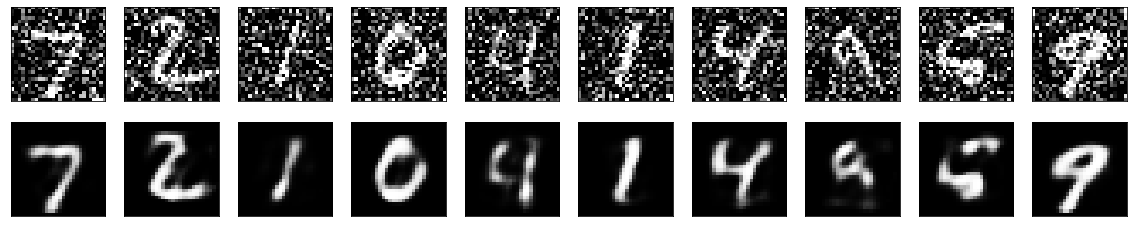

In [13]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()